# Problem Statement

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Downloads/gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
df['TEY'].nunique()

4207

In [5]:
df.shape

(15039, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
x=df.columns
x 

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [9]:
sc= StandardScaler()

df=sc.fit_transform(df)
df

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [10]:
df=pd.DataFrame(data=df, columns=x)
df 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [11]:
x=df.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
y=df['TEY']

In [12]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [13]:
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=143)

In [15]:
ytest

13942   -0.066868
9254    -0.059287
3517    -0.126884
2844    -0.026436
9402    -0.088979
           ...   
1483    -0.172369
8090    -0.033385
13984   -1.381528
12117    0.832736
2069     1.307808
Name: TEY, Length: 3008, dtype: float64

In [16]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=30, activation='sigmoid'))
ann.add(Dense(units=20, activation='relu'))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='mean_squared_error')

#Fit the data 
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
376/376 [==============================] - 4s 5ms/step - loss: 0.3071 - val_loss: 0.0227
Epoch 2/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0056
Epoch 3/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 4/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 5/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 6/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 8/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 9/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 10/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0025

<AxesSubplot:>

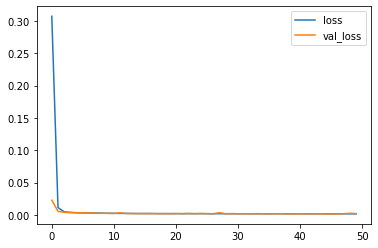

In [17]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [18]:
ypred = ann.predict(xtest)
ypred

94/94 [==============================] - 0s 2ms/step


array([[-0.02256738],
       [-0.09721731],
       [-0.12857871],
       ...,
       [-1.3805825 ],
       [ 0.847419  ],
       [ 1.2527649 ]], dtype=float32)

In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
ann =Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='tanh'))

ann.compile(optimizer='adam', loss='mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=45)

Epoch 1/45
376/376 [==============================] - 4s 4ms/step - loss: 0.2023 - val_loss: 0.1395
Epoch 2/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1388 - val_loss: 0.1356
Epoch 3/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1367 - val_loss: 0.1343
Epoch 4/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1357 - val_loss: 0.1334
Epoch 5/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1352 - val_loss: 0.1330
Epoch 6/45
376/376 [==============================] - 1s 4ms/step - loss: 0.1348 - val_loss: 0.1326
Epoch 7/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1345 - val_loss: 0.1323
Epoch 8/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1342 - val_loss: 0.1321
Epoch 9/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1340 - val_loss: 0.1319
Epoch 10/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1339 - val_loss: 0.1318

<AxesSubplot:>

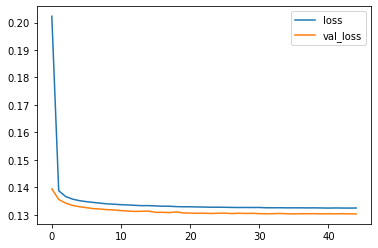

In [21]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping

In [22]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [23]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam', loss = 'mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=50)

Epoch 1/50
376/376 [==============================] - 4s 4ms/step - loss: 0.2865 - val_loss: 0.1428
Epoch 2/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1404 - val_loss: 0.1362
Epoch 3/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1374 - val_loss: 0.1347
Epoch 4/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1363 - val_loss: 0.1339
Epoch 5/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1356 - val_loss: 0.1333
Epoch 6/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1352 - val_loss: 0.1328
Epoch 7/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1347 - val_loss: 0.1324
Epoch 8/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1345 - val_loss: 0.1323
Epoch 9/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1343 - val_loss: 0.1318
Epoch 10/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1339 - val_loss: 0.1317

<AxesSubplot:>

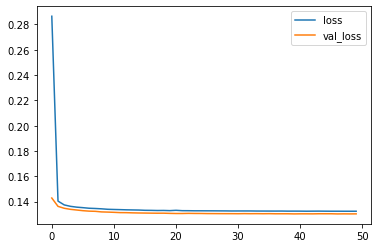

In [24]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Dropout Layer

In [25]:
ann = Sequential()

ann.add(Dense(units=35, activation='relu'))
ann.add(Dropout(rate=0.45))

ann.add(Dense(units=25, activation='relu'))
ann.add(Dropout(rate=0.4))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 50)

Epoch 1/50
376/376 [==============================] - 4s 5ms/step - loss: 0.3280 - val_loss: 0.1423
Epoch 2/50
376/376 [==============================] - 2s 5ms/step - loss: 0.1660 - val_loss: 0.1373
Epoch 3/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1505 - val_loss: 0.1373
Epoch 4/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1450 - val_loss: 0.1374
Epoch 5/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1435 - val_loss: 0.1364
Epoch 6/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1426 - val_loss: 0.1364
Epoch 7/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1408 - val_loss: 0.1358
Epoch 8/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1410 - val_loss: 0.1356
Epoch 9/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1409 - val_loss: 0.1349
Epoch 10/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1408 - val_loss: 0.1347

<AxesSubplot:>

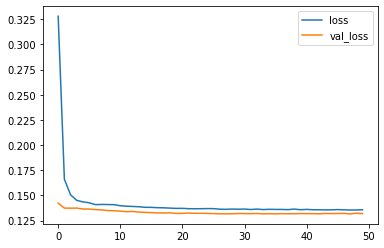

In [26]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early Stopping + Dropout Layer

In [28]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 55)

Epoch 1/55
376/376 [==============================] - 4s 5ms/step - loss: 0.7699 - val_loss: 0.5501
Epoch 2/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5939 - val_loss: 0.5493
Epoch 3/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5798 - val_loss: 0.5500
Epoch 4/55
376/376 [==============================] - 2s 4ms/step - loss: 0.5754 - val_loss: 0.5501
Epoch 5/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5730 - val_loss: 0.5502
Epoch 6/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5709 - val_loss: 0.5499
Epoch 7/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5736 - val_loss: 0.5493
Epoch 8/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5708 - val_loss: 0.5488
Epoch 9/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5711 - val_loss: 0.5483
Epoch 10/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5691 - val_loss: 0.5481

<AxesSubplot:>

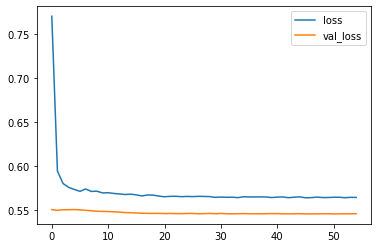

In [29]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

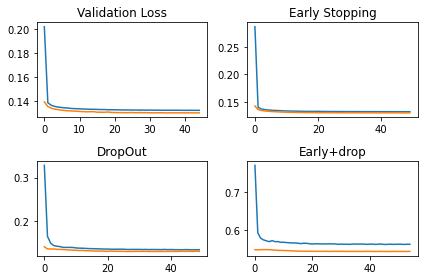

In [30]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()